# Quantum Entanglement Purification

## Deutsch's Protocol

In [176]:
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import transpile
from qiskit.result import Counts, marginal_counts
from qiskit.visualization import array_to_latex, plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector, Statevector, state_fidelity
from qiskit.providers.aer import StatevectorSimulator, QasmSimulator
from qiskit.circuit.library import RXGate
from qiskit.circuit.library import IGate

In [177]:
class QuantumCircuitOperations:
    def __init__(self, barrier: bool = False):
        self.barrier = barrier
    
    def create_random_statevector(self, dimensions: int) -> Statevector:
        return random_statevector(dimensions)
    
    def create_bell_pairs(self, qc: QuantumCircuit, regs: list) -> None:
        if self.barrier: qc.barrier()
        for reg in regs:
            for q in range(reg.size):
                if q % 2 == 0:
                    qc.h(reg[q])
                    qc.cx(reg[q], reg[q + 1])

In [178]:
class QuantumNativeSimulations:
    def statevector_sim(self, qc: QuantumCircuit) -> Statevector:
        # returns the circuit statevector
        state_sim: StatevectorSimulator = StatevectorSimulator()
        return state_sim.run(transpile(qc, state_sim)).result().get_statevector()
    
    def qasm_sim(self, qc: QuantumCircuit) -> Counts:
        qasm_sim: QasmSimulator = QasmSimulator()
        return qasm_sim.run(transpile(qc, qasm_sim), shots=10000).result().get_counts()

In [179]:
alice: QuantumRegister = QuantumRegister(2, "alice")
charlie: QuantumRegister = QuantumRegister(2, "charlie")
bob: QuantumRegister = QuantumRegister(2, "bob")

# crz: ClassicalRegister = ClassicalRegister(1, "crz")
# crx: ClassicalRegister = ClassicalRegister(1, "crx")

coz: ClassicalRegister = ClassicalRegister(1, "coz")
cox: ClassicalRegister = ClassicalRegister(1, "cox")
# cz: ClassicalRegister = ClassicalRegister(1, "cz")
# cx: ClassicalRegister = ClassicalRegister(1, "cx")

qc: QuantumCircuit = QuantumCircuit(alice, charlie, bob, coz, cox)

In [180]:
qco: QuantumCircuitOperations = QuantumCircuitOperations(True)
qns: QuantumNativeSimulations = QuantumNativeSimulations()

In [181]:
qco.create_bell_pairs(qc, [alice, charlie, bob])

qc1: Statevector = qns.statevector_sim(qc)

In [182]:
qc.barrier()
qc.append(RXGate(np.pi/2), [alice[0]])
qc.append(RXGate(np.pi/2), [alice[1]])
qc.append(RXGate(-np.pi/2), [charlie[0]])
qc.append(RXGate(-np.pi/2), [charlie[1]])
qc.append(RXGate(-np.pi/2), [bob[0]])
qc.append(RXGate(-np.pi/2), [bob[1]])

qc.barrier()

qc.cx(alice[0], charlie[0])
qc.cx(alice[1], charlie[1])

# qc.barrier()
qc.measure(charlie[0], coz)
qc.measure(charlie[1], cox)

# qc.i(charlie[0]).c_if(coz, 1)
# qc.i(charlie[1]).c_if(cox, 1)

In [183]:
qc.barrier()

qc.cx(alice[0], bob[0])
qc.cx(alice[1], bob[1])

qc.measure(bob[0], coz)
qc.measure(bob[1], cox)

# qc.i(alice).c_if(coz, 1)
# qc.i(alice[1]).c_if(cox, 1)

# Apply an identity gate to alice[0] and alice[1], conditioned on the values of coz and cox being (0,0) or (1,1)
# identity_gate = IGate().control(2, ctrl_state='11')  # Control the IGate on alice[0] and alice[1] with '11' (binary for (1,1))

# qc.append(identity_gate, [coz, cox, alice[0], alice[1]])

# Measurement (for illustration, you may have additional operations)
# qc.measure(alice, [coz, cox])

In [184]:
# qc.barrier()
# qc.cx(alice[0], alice[1])
# qc.h(alice[0])

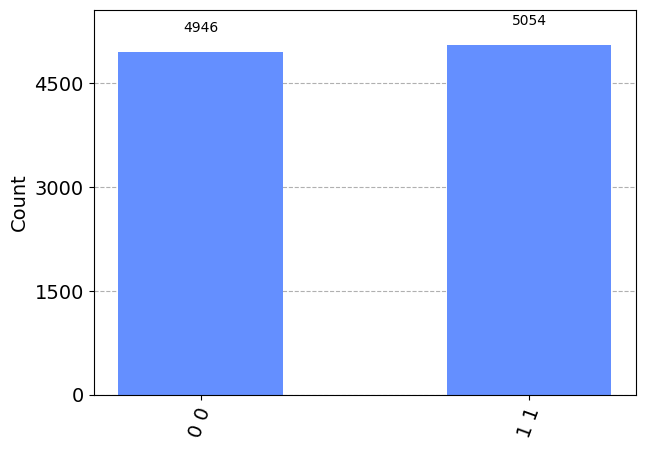

In [185]:
counts: Counts = qns.qasm_sim(qc)
fig = plot_histogram(counts)
fig

In [186]:
fig.savefig("purification_deutsch_results.jpg", dpi=500)

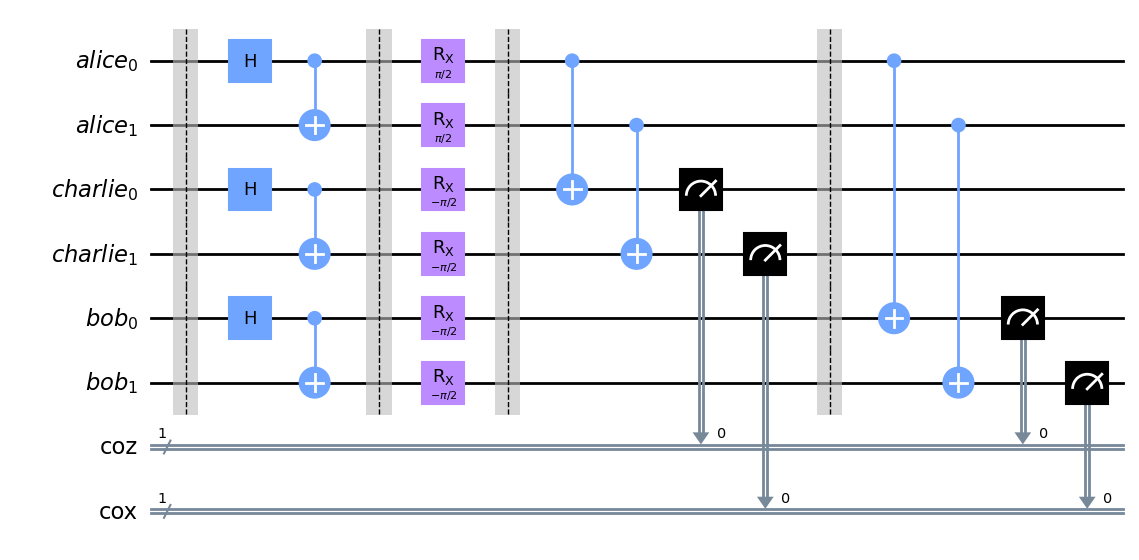

In [187]:
fig = qc.draw("mpl")
fig

In [188]:
fig.savefig("purification_deutsch_corrected.jpg", dpi=500)